In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sbdarti = np.concatenate((np.array([.970,.970,.970,.970,.970,.970,.970,.970,.970,.970,.970,
      .971,.972,.973,.974,.975,.975,.975,.975,.976,.977,.978,
      .979,.980,.980,.980,.980,.980,.980,.980,.980,.981,.982,
      .983,.984,.985,.985,.985,.985,.986,.987,.988,.989,.990,
      .990,.990,.990,.990,.990,.990,.990,.990,.990,.990,.990,
      .988,.987,.986,.985,.983,.982,.981,.980,.978,.977,.976,
      .975,.973,.972,.971,.970,.968,.967,.966,.965,.965,.965,
      .965,.965,.963,.962,.961,.960,.953,.952,.951,.950,.950,
      .950,.950,.950,.948,.945,.943,.940,.938,.935,.933,.930,
      .928,.925,.923,.920,.918,.915,.913,.910,.908,.907,.906,
      .905,.903,.902,.901,.900,.898,.895,.893,.890,.885,.880,
      .875,.870,.865,.860,.855,.850,.843,.842,.841,.840,.835,
      .830,.825,.820,.810,.800,.790,.780,.771,.762,.753,.745,
      .739,.733,.727,.720,.718,.715,.713,.710,.715,.720,.725,
      .730,.733,.735,.738,.740,.742,.743,.744,.745,.745,.745,
      .745,.745,.743,.742,.741,.740,.732,.724,.716,.710,.692,
      .674,.656,.640,.630,.620,.610,.600,.584,.568,.552,.535,
      .524,.513,.502,.490,.490,.490,.490,.490,.490,.490,.490,
      .490,.492,.493,.494,.495,.495,.495,.495,.495,.495,.495,
      .495,.495,.493,.492,.491,.490,.488,.485,.483,.480,.470,
      .460,.450,.440,.424,.408,.392,.375,.320,.264,.198,.150,
      .134,.118,.101,.085,.074,.063,.051,.040,.036,.032,.028,
      .025,.025,.025,.025,.025,.028,.030,.033,.035,.039,.043,
      .047,.050,.053,.055,.058,.060,.063,.065,.068,.070,.073,
      .075,.078,.080,.083,.085,.088,.090,.093,.095,.098,.100,
      .104,.108,.112,.115,.119,.123,.126,.130,.135,.140,.145,
      .150,.153,.155,.158,.160,.163,.165,.168,.170,.173,.175,
      .178,.180,.184,.188,.192,.195,.204,.213,.222,.230,.238,
      .246,.254,.260,.254,.248,.242,.235,.206,.177,.148,.120,
      .104,.088,.072,.055,.049,.043,.037,.030,.038,.035,.033,
      .030,.028,.025,.023,.020,.023,.022,.021,.020,.018,.017,
      .016,.015,.013,.012,.011,.010,.010,.010,.010,.010,.010,
      .010,.010,.010,.012,.013,.014,.015,.017,.018,.019,.020,
      .022,.023,.024,.025,.025,.025,.025,.025,.027,.030,.032,
      .035,.040,.045,.050,.055,.059,.063,.067,.070,.074,.078,
      .082,.085,.089,.093,.097,.100,.102,.103,.104,.105,.109,
      .113,.117,.120,.124,.128,.132,.135,.130,.125,.120,.115,
      .108,.100,.092,.085,.081,.077,.073,.070,.068,.065,.063,
      .062,.058,.055,.053,.050,.048,.047,.046,.045,.042,.040,
      .038,.035,.033,.032,.031,.030,.030,.030,.030,.030,.028,
      .027,.026,.025,.025,.025,.025,.025,.025,.025,.025,.025,
      .025,.025,.025,.025,.025,.025,.025,.025,.025,.025,.025,
      .025,.025,.025,.025,.025,.023,.022,.021,.020,.018,.017,
      .016,.015,.013,.012,.011,.010,.008,.007,.006,.005,.003,
      .002,.001,.000]),np.zeros(264)))
wlalb2 = np.zeros(len(sbdarti))
for n in range(0,len(wlalb2)):
    wlalb2[n] = 0.25 + (4.0-0.25)*float(n)/(len(wlalb2)-1)

In [6]:
wlalb2[np.argwhere(sbdarti>0)[-1][0]]

2.675

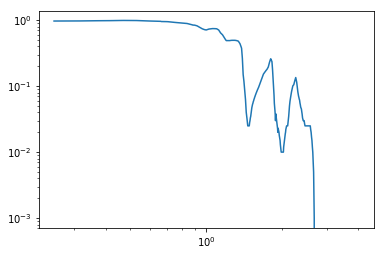

In [7]:
plt.plot(wlalb2,sbdarti)
plt.xscale('log')
plt.yscale('log')

In [8]:
manifest = {}
with open("manifest.txt","r") as mn:
    lines = mn.read().split('\n')
    for l in lines:
        lfile = l.split()
        if len(lfile)>0:
            manifest[lfile[0]] = lfile[1]

In [9]:
names = sorted(manifest.keys())
ix = 0
for n in names:
    print ix,n
    ix+=1

0 andesitefine
1 andesitesolid
2 basaltsolid
3 brownsand
4 clearice
5 coarsesnow
6 dunesand
7 finesnow
8 frost
9 mediumsnow
10 seafoam
11 seawater
12 tapwater
13 yellowloam
14 yellowsand


In [10]:
ids = [4,5,7,9,11]

In [11]:
for i in ids:
    print names[i]

clearice
coarsesnow
finesnow
mediumsnow
seawater


In [12]:
weights = np.array([0.1,0.45,0.15,0.2,0.1])
weights[0] = 1.75*weights[0]
weights[-1] = 1.75*weights[-1]
weights[1:-1] -= (weights[0]+weights[-1])/1.75*0.75/len(weights[1:-1])

In [13]:
print np.sum(weights),weights

1.0 [0.175 0.4   0.1   0.15  0.175]


In [14]:
wvref = np.loadtxt("wvref.txt")

In [15]:
print wvref.shape

(965,)


In [16]:
specs = np.zeros((len(ids),wvref.shape[0]))


In [17]:
for idn in range(len(ids)):
    filename = manifest[names[ids[idn]]]
    with open(filename,"r") as fileobj:
        text = fileobj.read().split('\n')
        for k in range(len(text)):
            if text[k].split()[0]=="Additional":
                nhead = k+2
                break
    spec = np.loadtxt(filename,skiprows=nhead,ndmin=2).transpose()
    if spec[0,0] > spec[0,-1]:
        spec = np.flip(spec,axis=1)
    specs[idn,:] = np.interp(wvref,spec[0,:],spec[1,:])

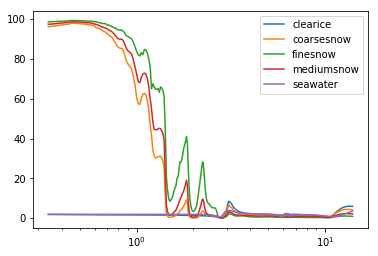

In [18]:
for idn in range(len(ids)):
    plt.plot(wvref,specs[idn,:],label=names[ids[idn]])
plt.xscale('log')
plt.legend()

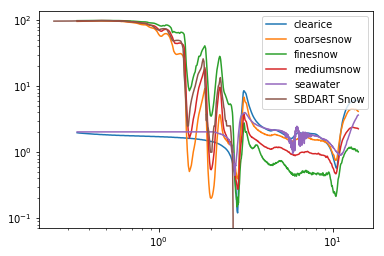

In [19]:
for idn in range(len(ids)):
    plt.plot(wvref,specs[idn,:],label=names[ids[idn]])
plt.plot(wlalb2,sbdarti*100,label="SBDART Snow")
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [20]:
wtspec = np.copy(specs)
for n in range(len(ids)):
    wtspec[n,:] *= weights[n]

In [21]:
netspec = np.sum(wtspec,axis=0)

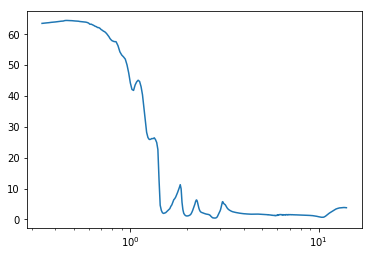

In [22]:
plt.plot(wvref,netspec)
plt.xscale('log')

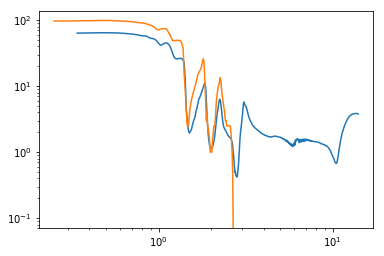

In [23]:
plt.plot(wvref,netspec)
plt.plot(wlalb2,sbdarti*100)
plt.xscale('log')
plt.yscale('log')

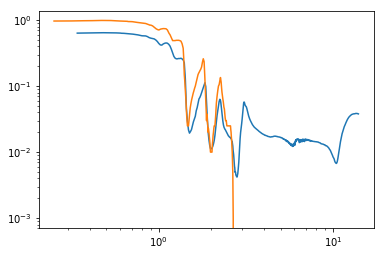

In [24]:
plt.plot(wvref,netspec*0.01)
plt.plot(wlalb2,sbdarti)
plt.xscale('log')
plt.yscale('log')

(0.34, 14.01)

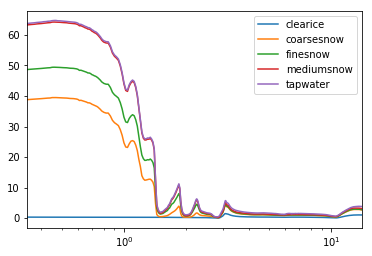

In [160]:
for n in range(len(ids)):
    plt.plot(wvref,np.sum(wtspec[:n+1,:],axis=0),label=names[ids[n]])
plt.xscale('log')
plt.legend()
plt.xlim(wvref.min(),wvref.max())

In [161]:
import colormatch as cm

In [162]:
print np.sum(weights)

1.0


In [163]:
def bbtemp(teff,wvref):
    sbk = 5.67e-8
    const = 0.0143877735383
    bbf = 1.0/wvref**5 * (1.0/(np.exp(const/(teff*wvref*1e-6))-1))
    return bbf

In [164]:
rgbs = []
srgbs = []
albs = []
stemps = np.linspace(2800,7900,num=18)
print stemps
bbs = []
for s in range(0,len(stemps)):
    bbf = bbtemp(stemps[s],wvref)
    bbs.append(bbtemp(stemps[s]-650.0,wvref))
    refl = netspec*0.01*bbf
    albb = np.trapz(refl[:145],x=wvref[:145])/np.trapz(bbf[:145],x=wvref[:145])
    albs.append(albb)
    #srgbs.append(cm.specs2rgb(wvref*1e3,[bbf,]))
    rgbs.append(cm.spec2rgb(wvref*1e3,refl,normalization=albb))
srgbs = cm.specs2rgb(wvref*1e3,np.array(bbs))

[2800. 3100. 3400. 3700. 4000. 4300. 4600. 4900. 5200. 5500. 5800. 6100.
 6400. 6700. 7000. 7300. 7600. 7900.]


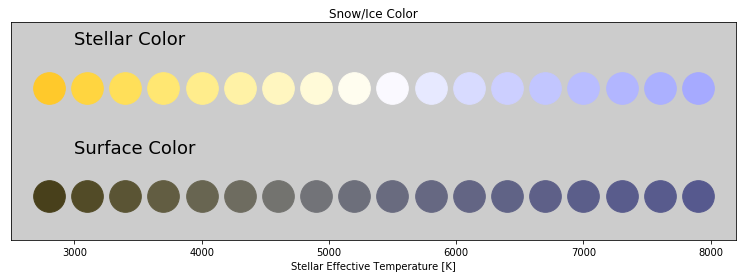

In [165]:
fig,ax=plt.subplots(figsize=(13,4))
for s in range(len(stemps)):
    plt.scatter(stemps[s],1.0,marker='o',color=np.array(rgbs[s])/np.amax(rgbs[s])*albs[s],s=1000)
    plt.scatter(stemps[s],1.25,marker='o',color=np.array(srgbs[s])/np.amax(srgbs[s]),s=1000)
    #plt.annotate("%d K"%stemps[s],(stemps[s]-100,1.35))
    #print stemps[s]
    #plt.axvline(stemps[s])
ax.set_facecolor('0.8')
plt.annotate("Stellar Color",(3000,1.35),color='k',fontsize=18)
plt.annotate("Surface Color",(3000,1.1),color='k',fontsize=18)
plt.ylim(0.9,1.4)
plt.xlim(2500,8200)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False)
plt.xlabel("Stellar Effective Temperature [K]")
plt.title("Snow/Ice Color")
plt.savefig("colorgrid_snow.png",bbox_inches='tight')

In [166]:
alb1 = np.zeros(100)
alb2 = np.zeros(100)
albb = np.zeros(100)
teffs = np.linspace(2700,6000,num=100)

In [167]:
for n in range(100):
    bbf = bbtemp(teffs[n],wvref)
    refl = netspec*0.01*bbf
    alb1[n] = np.trapz(refl[:42],x=wvref[:42])/np.trapz(bbf[:42],x=wvref[:42])
    alb2[n] = np.trapz(refl[42:145],x=wvref[42:145])/np.trapz(bbf[42:145],x=wvref[42:145])
    albb[n] = np.trapz(refl[:145],x=wvref[:145])/np.trapz(bbf[:145],x=wvref[:145])

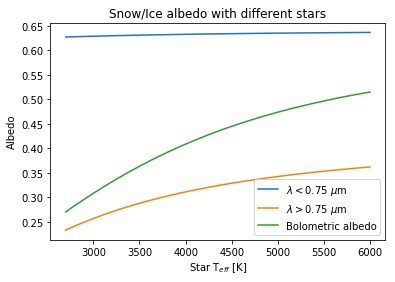

In [168]:
plt.plot(teffs,alb1,label="$\lambda<{0.75}$ $\mu$m")
plt.plot(teffs,alb2,label="$\lambda>{0.75}$ $\mu$m")
plt.plot(teffs,albb,label='Bolometric albedo')
plt.legend(loc='best')
plt.xlabel("Star T$_{eff}$ [K]")
plt.ylabel("Albedo")
plt.title("Snow/Ice albedo with different stars")
plt.savefig("snow_bolometric.png",bbox_inches='tight')

In [169]:
print teffs[-16],albb[-7]

5500.0 0.50829202497667


In [170]:
specvar = "seaicemin"
specinttext = "       real :: %s(%d) = (/"%(specvar,len(wvref))
specinttext += ",".join(["%.4f" % number for number in netspec[0:8]]) + ", &\n"
n=8
while n+8<len(wvref):
    specinttext += "      &          " + ",".join(["%.4f" % number for number in netspec[n:n+8]]) + ", &\n"
    n+=8
specinttext += "      &          " + ",".join(["%.4f" % number for number in netspec[n:]]) + " /)"

In [171]:
newfilename = "seaicemin_interp_f90.txt"
with open(newfilename,"w") as fileobj:
    fileobj.write(specinttext+'\n')

In [172]:
print specinttext

       real :: seaicemin(965) = (/63.7232,63.8155,63.8870,63.9539,64.0566,64.1136,64.1879,64.3061, &
      &          64.3513,64.4550,64.4961,64.6427,64.7033,64.7169,64.6058,64.5981, &
      &          64.5453,64.4776,64.4476,64.3931,64.3236,64.2880,64.2511,64.1995, &
      &          64.1227,64.0151,63.8082,63.4353,63.4578,63.2500,63.0222,62.7842, &
      &          62.6513,62.3697,62.3330,62.0783,61.7111,61.4903,61.1514,61.0185, &
      &          60.7199,60.3163,59.8497,59.3833,58.8037,58.3719,58.0844,57.7799, &
      &          57.7347,56.4529,54.4746,53.4116,52.8343,52.0940,50.2247,47.6096, &
      &          44.3354,42.2188,41.9084,43.6634,44.6948,45.2152,44.7806,43.1203, &
      &          40.4363,36.2569,32.0581,28.3198,26.5904,25.9552,25.9938,26.2599, &
      &          26.2138,26.4962,25.9052,24.9788,22.6739,12.8247,4.5918,2.9693, &
      &          2.2126,1.9515,2.0933,2.1886,2.5550,2.8920,3.2142,3.5190, &
      &          4.2278,4.7224,5.5441,6.3847,6.7416,7.2386,7.9924,8.7